In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge

In [4]:
df_train = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/train.csv", parse_dates=['date'])
original_train_df = df_train.copy()
df_test = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/test.csv", parse_dates=['date'])

In [5]:
display(df_train)
display(df_test)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book


In [6]:
def val_count_df(df, column_name, sort_by_column_name=False):
    value_count = df[column_name].value_counts().reset_index().rename(columns={column_name:"Value Count","index":column_name}).set_index(column_name)
    value_count["Percentage"] = df[column_name].value_counts(normalize=True)*100
    value_count = value_count.reset_index()
    if sort_by_column_name:
        value_count = value_count.sort_values(column_name)
    return value_count

def plot_pie(df, column_name):
    plot_values = val_count_df(df, column_name)
    plot_values.set_index(column_name).plot.pie(y='Value Count', figsize=(6, 6), 
                                                legend=False, ylabel='')

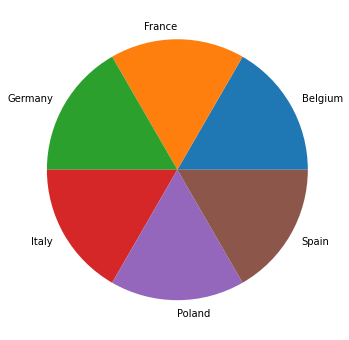

In [7]:
plot_pie(df_train, 'country')

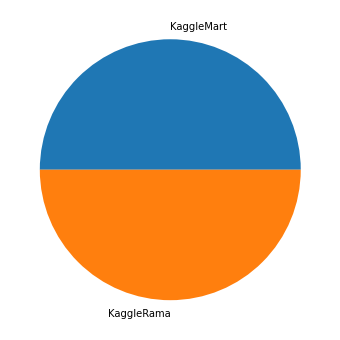

In [8]:
plot_pie(df_train, 'store')

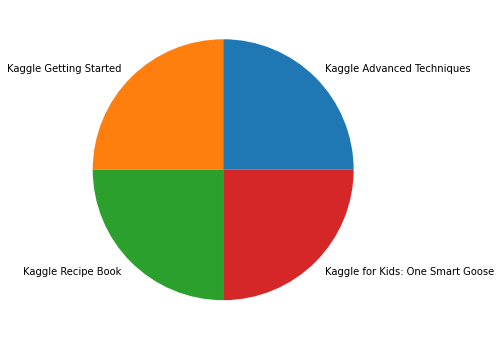

In [9]:
plot_pie(df_train, 'product')

In [10]:
df_train.groupby(['country', 'store', 'product'])['num_sold'].count()

country  store       product                         
Belgium  KaggleMart  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
         KaggleRama  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
France   KaggleMart  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
         KaggleRama  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                

In [11]:
df_weekly = df_train.groupby(['country', 'store', 'product', pd.Grouper(key='date', freq='W')])['num_sold'].sum().rename('num_sold').reset_index()
df_monthly = df_train.groupby(['country', 'store', 'product', pd.Grouper(key='date', freq='MS')])['num_sold'].sum().rename('num_sold').reset_index()

In [12]:
def plot_sum(df):
    f, axes = plt.subplots(2, 2, figsize=(16, 16), sharex=True, sharey=True)
    for n, product in enumerate(df['product'].unique()):
        df_plot = df.loc[df['product'] == product]
        sns.lineplot(data=df_plot, x='date', y='num_sold', hue='country', style='store', ax=axes[n//2, n%2])

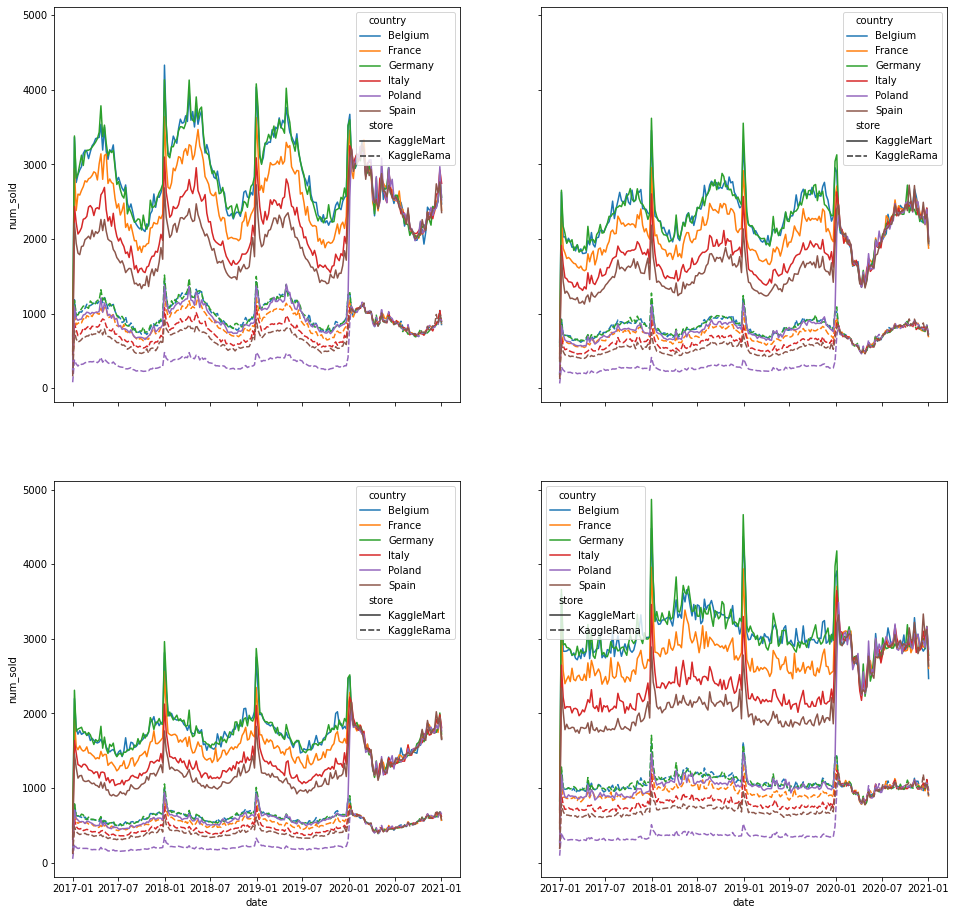

In [13]:
plot_sum(df_weekly)

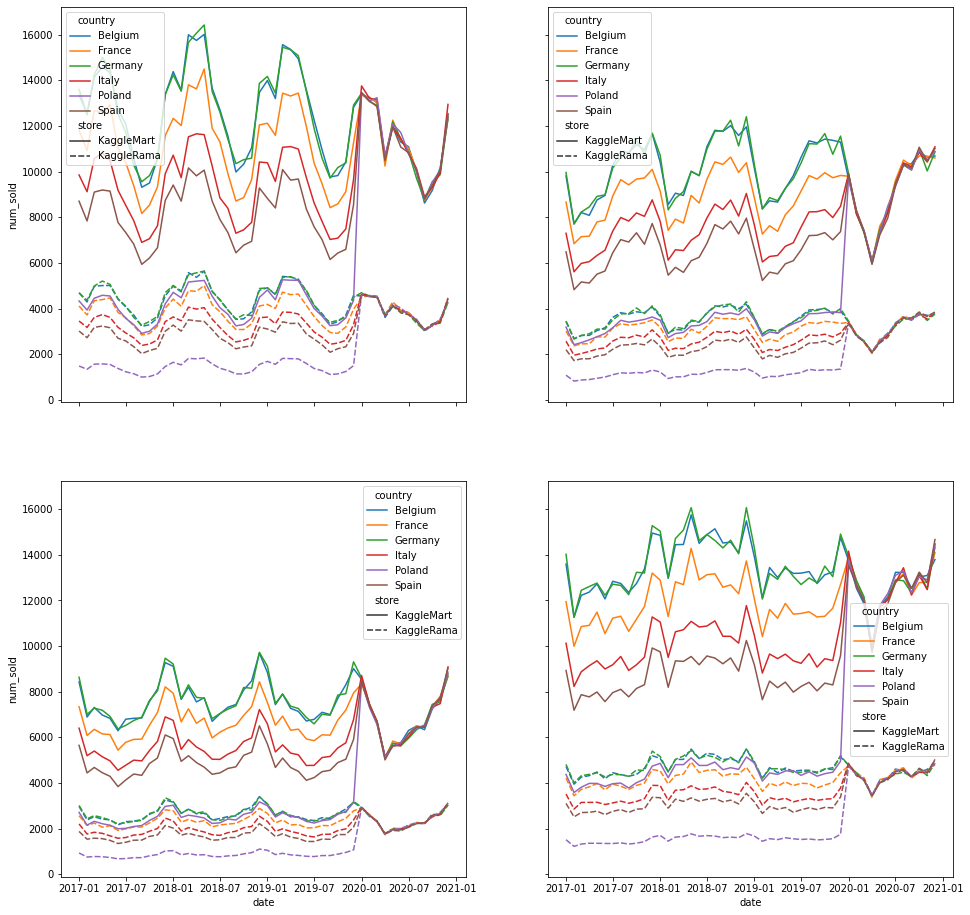

In [14]:
plot_sum(df_monthly)

In [15]:
df_train.groupby(['store'])['num_sold'].sum() / df_train['num_sold'].sum()

store
KaggleMart    0.742515
KaggleRama    0.257485
Name: num_sold, dtype: float64

<AxesSubplot:xlabel='date', ylabel='num_sold'>

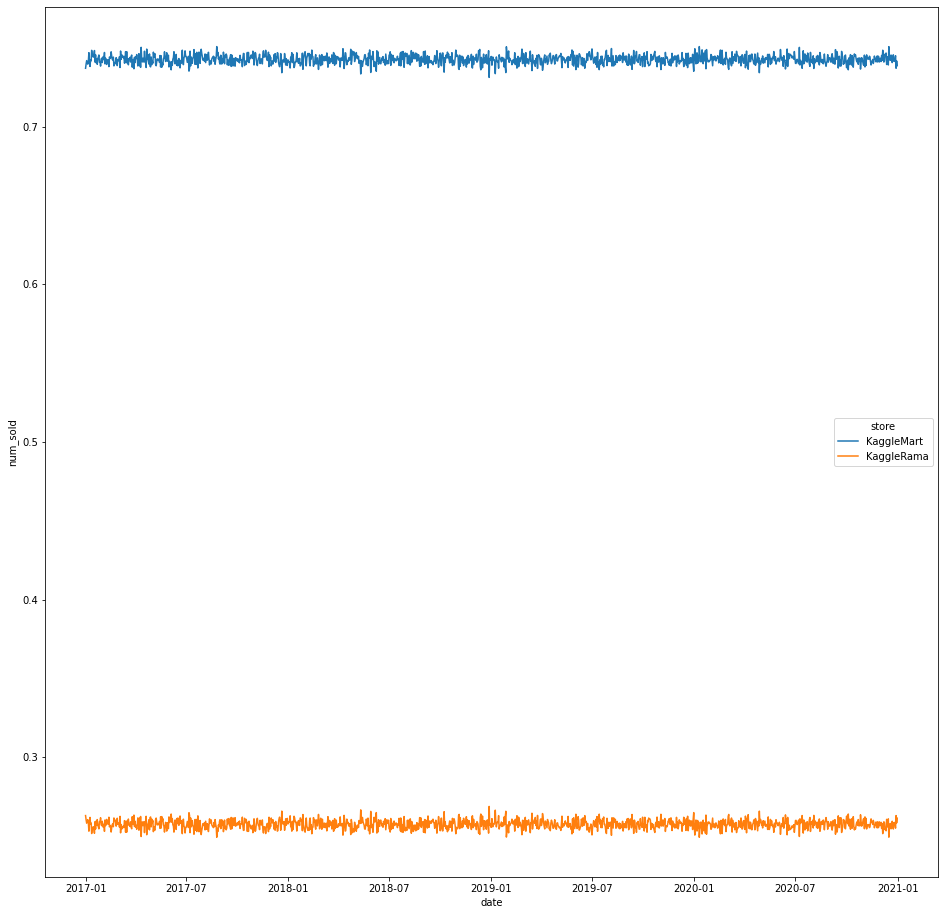

In [16]:
store_ratio = df_train.groupby(['date', 'store'])['num_sold'].sum() / df_train.groupby(['date'])['num_sold'].sum()
f, axes = plt.subplots(figsize=(16, 16))
sns.lineplot(data=store_ratio.reset_index(), x='date', y='num_sold', hue='store', ax=axes)

In [17]:
df_store_ratio = pd.DataFrame(store_ratio).reset_index()
store_weights = df_store_ratio.groupby('store')['num_sold'].sum() / df_store_ratio['num_sold'].sum()
store_weights
# store_weight = df_store_ratio.loc[df_store_ratio['store'] == 'KaggleMart', ['num_sold']].mean()['num_sold'] \
#              / df_store_ratio.loc[df_store_ratio['store'] == 'KaggleRama', ['num_sold']].mean()['num_sold']
# store_weight

store
KaggleMart    0.742519
KaggleRama    0.257481
Name: num_sold, dtype: float64

In [18]:
df_train_new = df_train.copy()
for store in store_weights.index:
    df_train_new.loc[df_train_new['store'] == store, 'num_sold'] *= store_weights[store]
df_weekly = df_train_new.groupby(['country', 'store', 'product', pd.Grouper(key='date', freq='W')])['num_sold'].sum().reset_index()
df_monthly = df_train_new.groupby(['country', 'store', 'product', pd.Grouper(key='date', freq='MS')])['num_sold'].sum().reset_index()

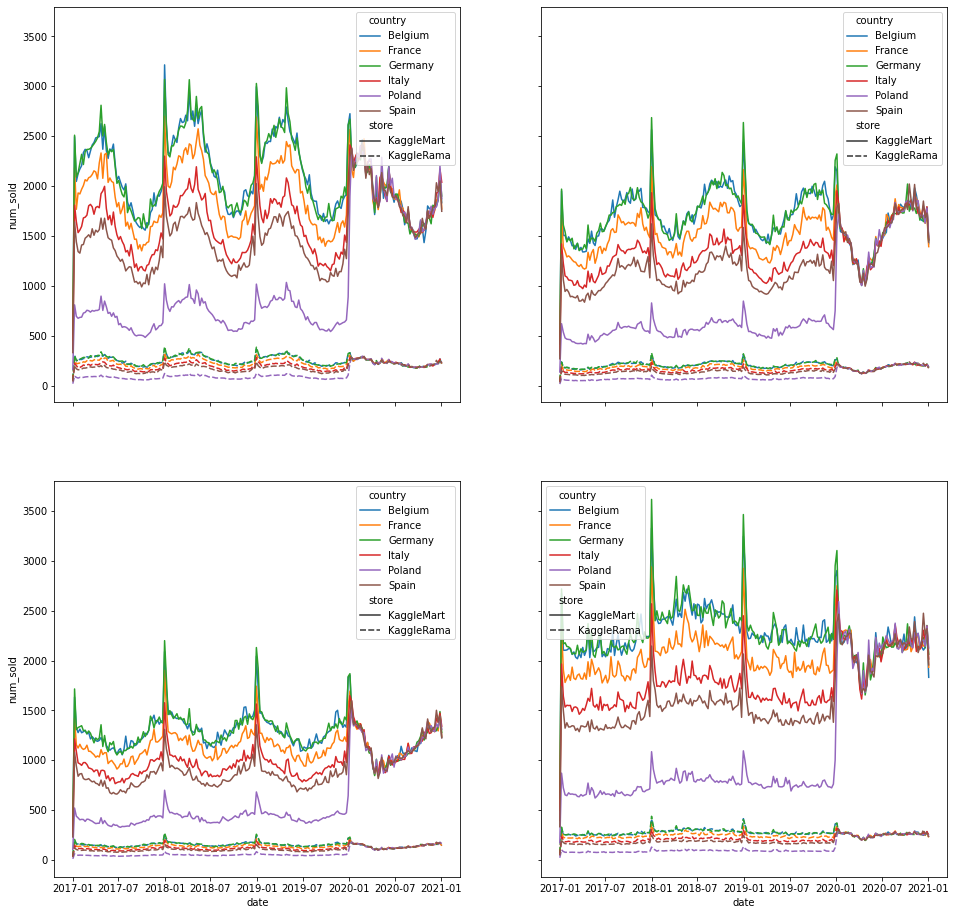

In [19]:
plot_sum(df_weekly)

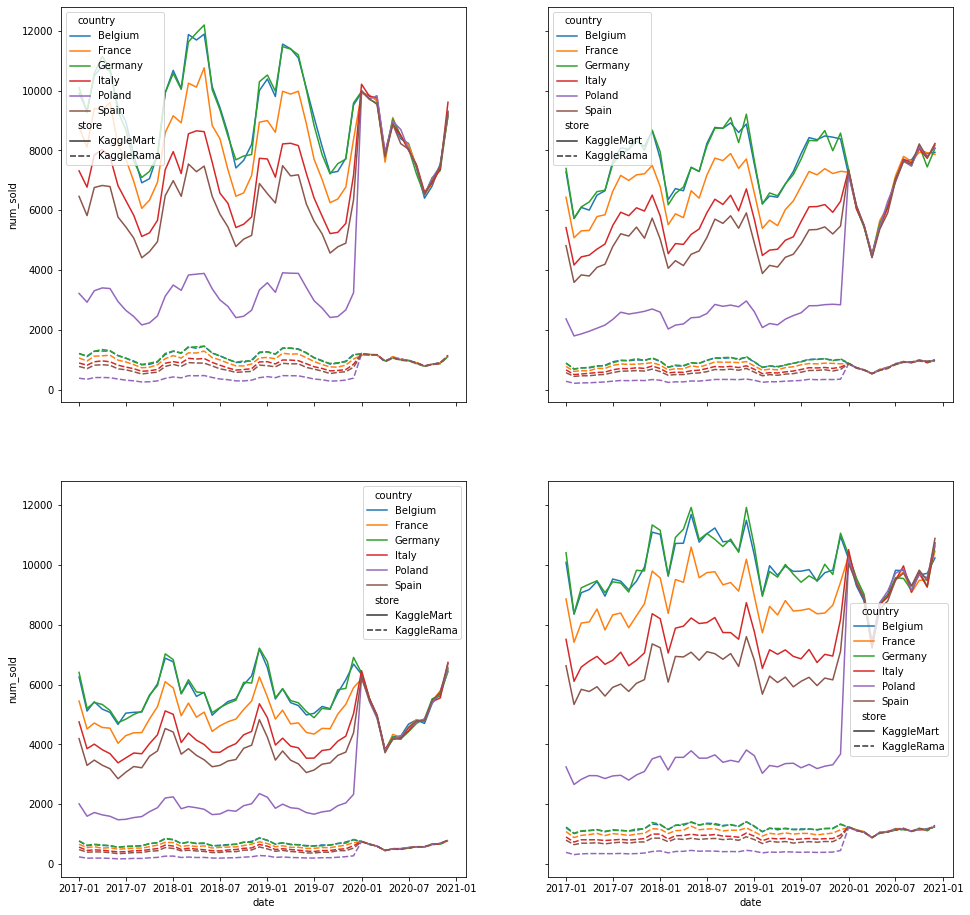

In [20]:
plot_sum(df_monthly)

In [21]:
country_weights = df_train.loc[df_train['date'] < '2020-01-01'].groupby('country')['num_sold'].sum() \
                / df_train.loc[df_train['date'] >= '2020-01-01', 'num_sold'].sum()
country_weights

country
Belgium    0.554850
France     0.484975
Germany    0.556512
Italy      0.403935
Poland     0.180822
Spain      0.353272
Name: num_sold, dtype: float64

In [22]:
df_weighted_train = df_train.copy()
for country in country_weights.index:
    country_weight = country_weights['Belgium'] / country_weights[country]
    df_weighted_train.loc[(df_weighted_train['country'] == country) & (df_weighted_train['date'] < '2020-01-01'), 'num_sold'] *= country_weight

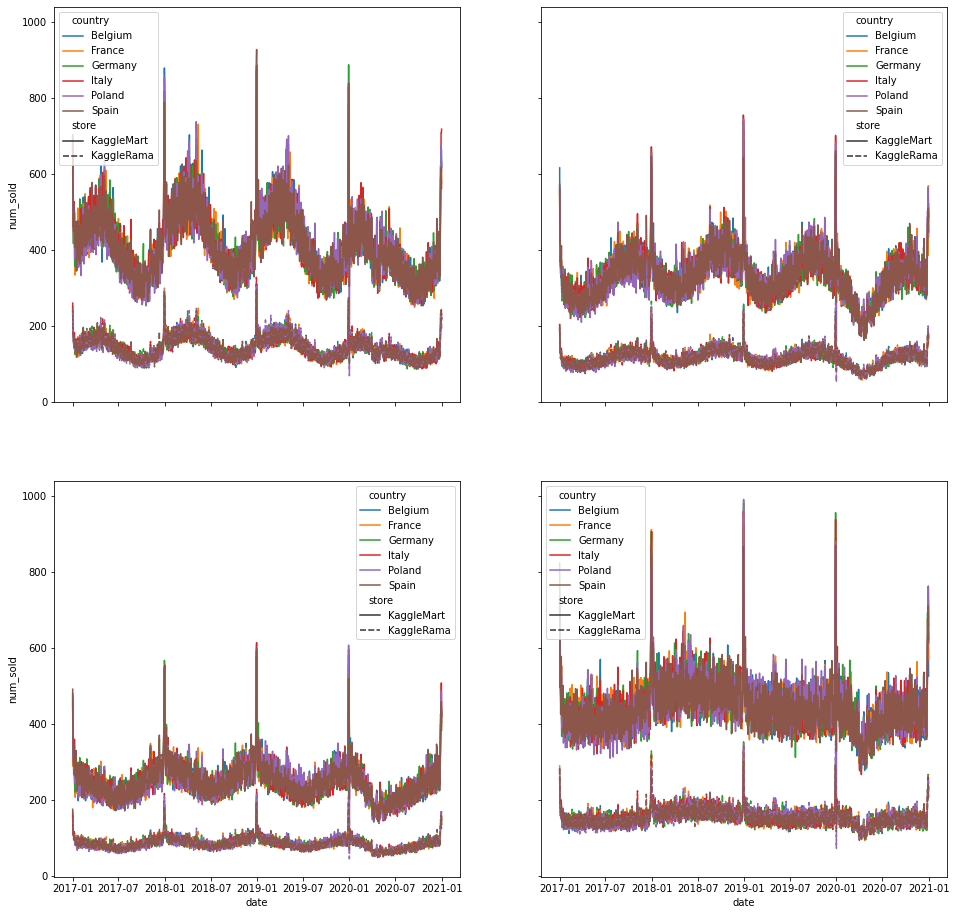

In [23]:
plot_sum(df_weighted_train)

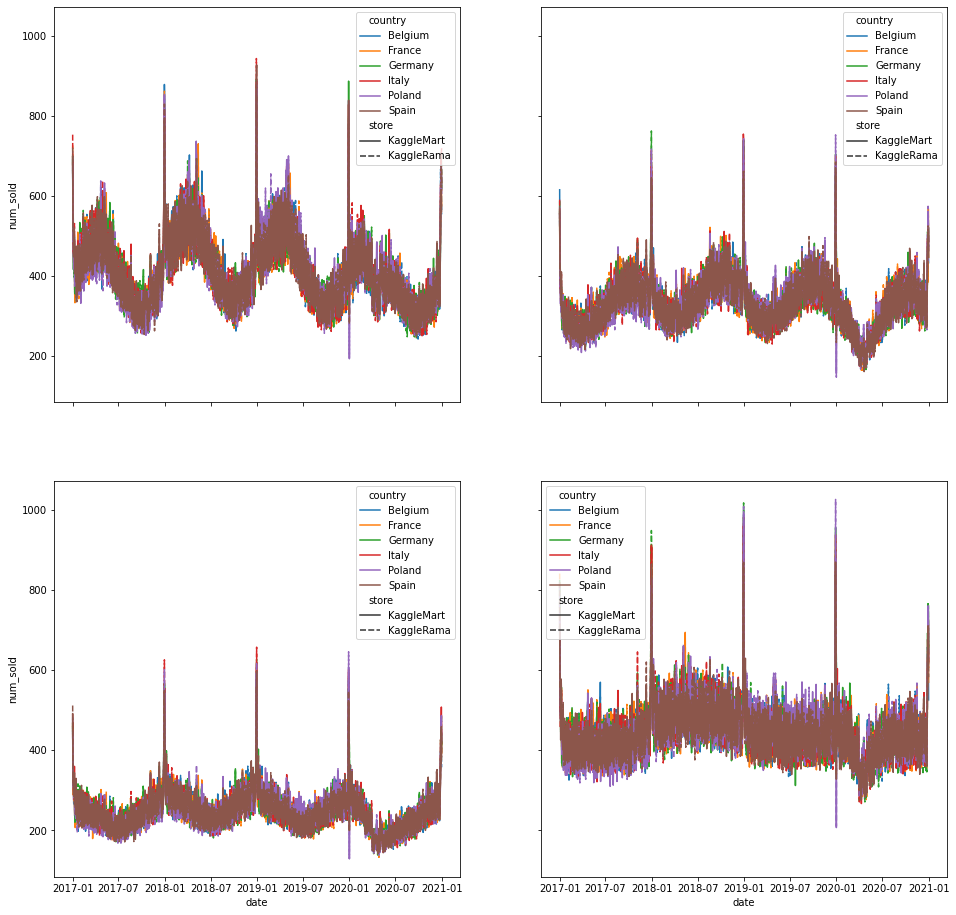

In [24]:
df_weighted_train = df_train.copy()
for country in country_weights.index:
    country_weight = country_weights['Belgium'] / country_weights[country]
    df_weighted_train.loc[(df_weighted_train['country'] == country) & (df_weighted_train['date'] < '2020-01-01'), 'num_sold'] *= country_weight
df_weighted_train.loc[df_weighted_train['store'] == 'KaggleRama', ['num_sold']] *= store_weights['KaggleMart'] / store_weights['KaggleRama']
plot_sum(df_weighted_train)

<AxesSubplot:xlabel='date', ylabel='num_sold'>

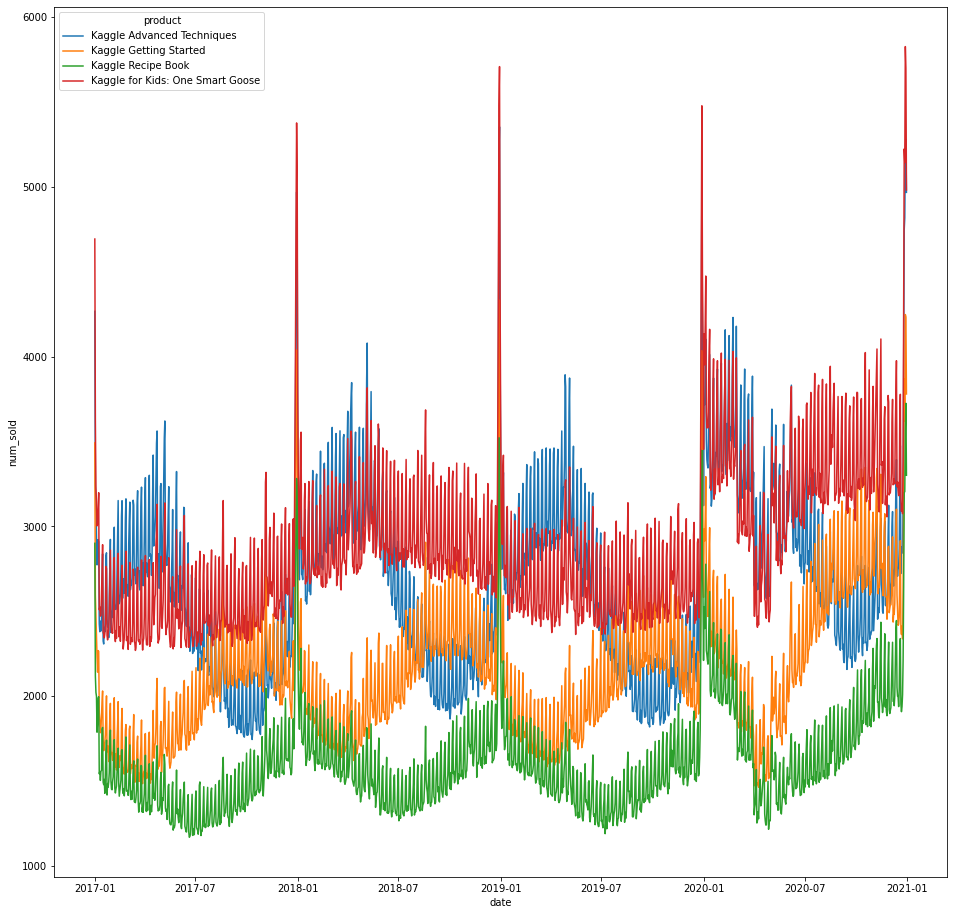

In [25]:
df_product = df_train.groupby(['date', 'product'])['num_sold'].sum().reset_index()
f, axes = plt.subplots(figsize=(16, 16))
sns.lineplot(data=df_product, x='date', y='num_sold', hue='product')

<AxesSubplot:xlabel='date', ylabel='ratio'>

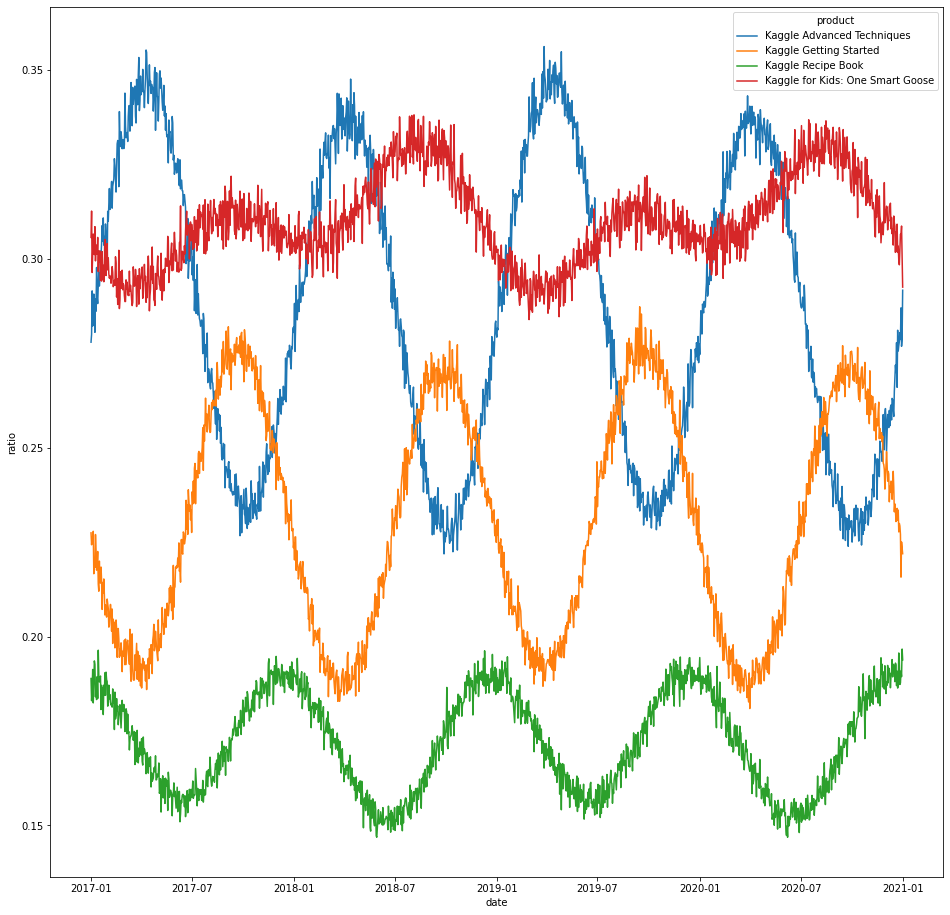

In [26]:
df_product_ratio = df_product.pivot('date', 'product', 'num_sold')
df_product_ratio = df_product_ratio.apply(lambda x: x / x.sum(), axis=1)
df_product_ratio = df_product_ratio.stack().rename('ratio').reset_index()
f, axes = plt.subplots(figsize=(16, 16))
sns.lineplot(data=df_product_ratio, x='date', y='ratio', hue='product', ax=axes)

<AxesSubplot:xlabel='date', ylabel='num_sold'>

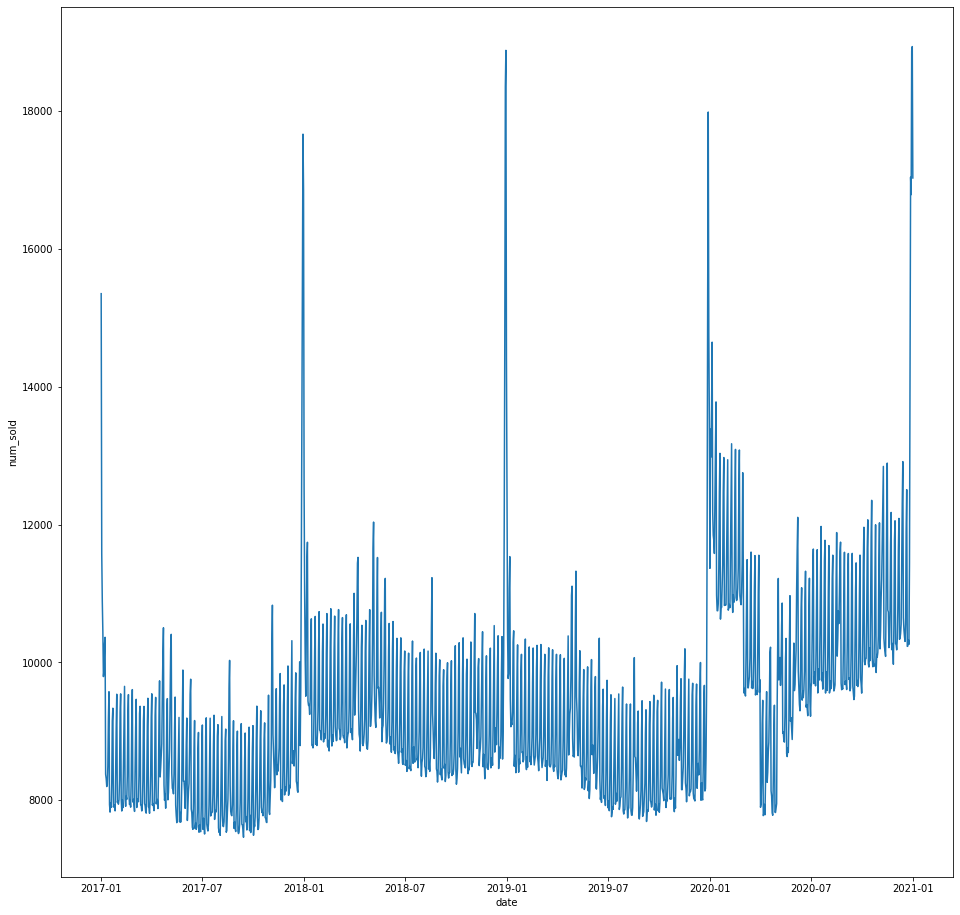

In [27]:
df_sum = df_train.groupby(['date'])['num_sold'].sum().reset_index()
f, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(data=df_sum, x='date', y='num_sold')

<AxesSubplot:xlabel='date', ylabel='num_sold'>

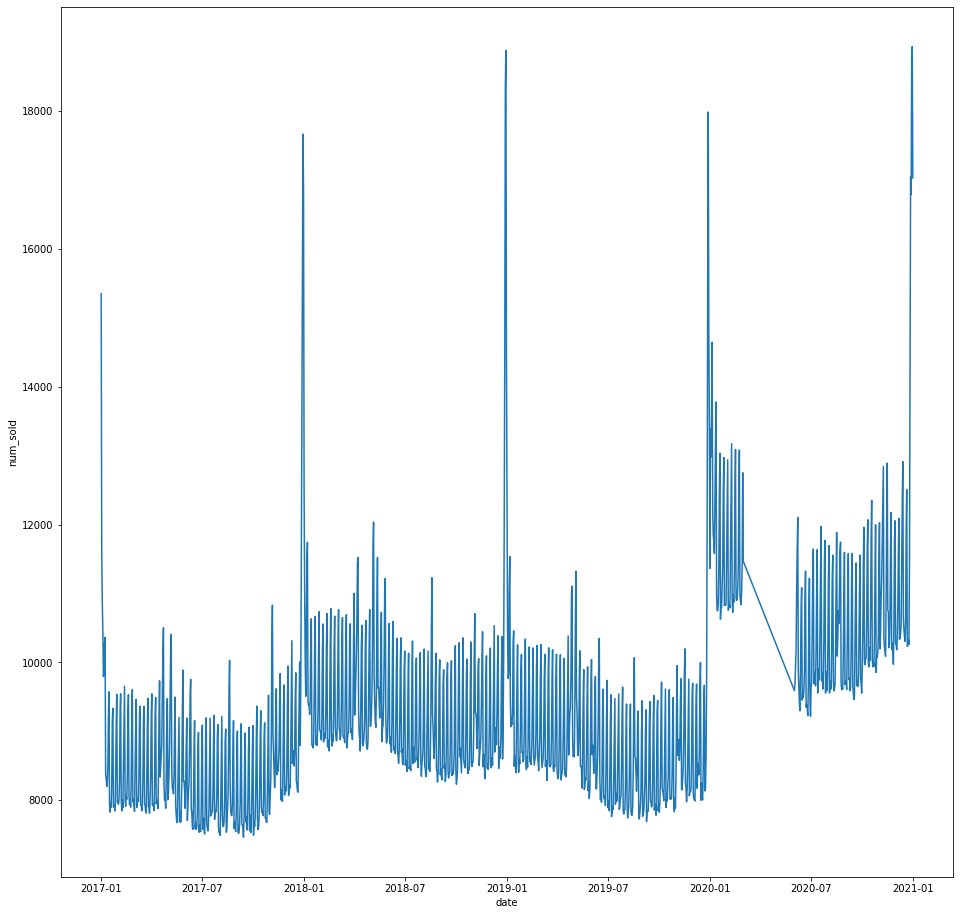

In [28]:
df_new_train = df_sum.loc[~((df_sum['date'] > '2020-03-01') & (df_sum['date'] < '2020-06-01'))]
f, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(data=df_new_train, x='date', y='num_sold')

In [50]:
def feature_engineering(df, week_day_dict, year_day_dict):
    new_df = df.copy()
    
    new_df['year'] = new_df['date'].dt.year
    
    new_df['month'] = new_df['date'].dt.month
    new_df['month_sin'] = np.sin(new_df['month'] * (2.0 * np.pi / 12.0))
    new_df['month_cos'] = np.cos(new_df['month'] * (2.0 * np.pi / 12.0))
    
    new_df['day_of_year'] = new_df['date'].dt.day_of_year
    new_df['day_of_week'] = new_df['date'].dt.day_of_week
    
    new_df = new_df.loc[~(new_df['date'] == '2020-02-29')]
    new_df['day_of_year'] = new_df.apply(lambda x: x['day_of_year'] if ((x['date'] < pd.Timestamp('2020-02-29')) | (x['date'] >= pd.Timestamp('2021-01-01'))) else x['day_of_year'] - 1, axis=1)
    
    if 'num_sold' in new_df.columns:
        
        for week_day in new_df['day_of_week'].unique():
            week_day_dict[str(week_day)] = new_df.loc[new_df['day_of_week'] == week_day, 'num_sold'].sum()
        
        for year_day in new_df['day_of_year'].unique():
            year_day_dict[str(year_day)] = new_df.loc[new_df['day_of_year'] == year_day, 'num_sold'].sum()
    
    max_val = week_day_dict[max(week_day_dict, key=week_day_dict.get)]
    new_week_day_dict = {k: v / max_val for k, v in week_day_dict.items()}
    for week_day in new_df['day_of_week'].unique():
        new_df.loc[new_df['day_of_week'] == week_day, 'day_of_week'] = new_week_day_dict[str(week_day)]
    
    max_val = year_day_dict[max(year_day_dict, key=year_day_dict.get)]
    new_year_day_dict = {k: v / max_val for k, v in year_day_dict.items()}
    for year_day in new_df['day_of_year'].unique():
        new_df.loc[new_df['day_of_year'] == year_day, 'day_of_year'] = new_year_day_dict[str(year_day)]
    
    #new_df['important_dates'] = new_df.apply(lambda x: x['day_of_year'] if x['day_of_year'] in [1,2,3,4,5,6,7,8,125,126,360,361,362,363,364,365] else 0, axis=1)
    new_df = new_df.drop(columns=['date', 'month'])
    #new_df = pd.get_dummies(new_df, columns=['day_of_week', 'important_dates'])
    return new_df

In [51]:
week_day_dict = dict()
year_day_dict = dict()
df_final_train = feature_engineering(df_new_train, week_day_dict, year_day_dict)
df_final_test = feature_engineering(df_test.drop(columns=['country', 'store', 'product', 'row_id']), week_day_dict, year_day_dict)
display(df_final_train)
display(df_final_test)

{'6': 2080166, '0': 1730094, '1': 1727216, '2': 1723849, '3': 1726644, '4': 1801713, '5': 1966432}


,num_sold,year,month_sin,month_cos,day_of_year,day_of_week
0,15352,2017,5.000000e-01,0.866025,0.724832,0.830326
1,11578,2017,5.000000e-01,0.866025,0.653386,0.831710
2,10884,2017,5.000000e-01,0.866025,0.615022,0.830326
3,10445,2017,5.000000e-01,0.866025,0.612388,0.828707
4,9795,2017,5.000000e-01,0.866025,0.646640,0.830051
...,...,...,...,...,...,...
1456,17042,2020,-2.449294e-16,1.000000,0.738325,0.830326
1457,16789,2020,-2.449294e-16,1.000000,0.850670,0.831710
1458,18876,2020,-2.449294e-16,1.000000,1.000000,0.830326
1459,18938,2020,-2.449294e-16,1.000000,0.989494,0.828707


,year,month_sin,month_cos,day_of_year,day_of_week
0,2021,5.000000e-01,0.866025,0.724832,0.866139
1,2021,5.000000e-01,0.866025,0.724832,0.866139
2,2021,5.000000e-01,0.866025,0.724832,0.866139
3,2021,5.000000e-01,0.866025,0.724832,0.866139
4,2021,5.000000e-01,0.866025,0.724832,0.866139
...,...,...,...,...,...
17515,2021,-2.449294e-16,1.000000,0.870331,0.866139
17516,2021,-2.449294e-16,1.000000,0.870331,0.866139
17517,2021,-2.449294e-16,1.000000,0.870331,0.866139
17518,2021,-2.449294e-16,1.000000,0.870331,0.866139


In [52]:
x_train = df_final_train.drop(columns='num_sold')
y_train = df_final_train['num_sold']

model = Ridge(tol=1e-2, max_iter=1000000, random_state=0)
model.fit(x_train, y_train)
preds = model.predict(df_final_test)
df_final_test['num_sold'] = preds

In [53]:
df_final_test

,year,month_sin,month_cos,day_of_year,day_of_week,num_sold
0,2021,5.000000e-01,0.866025,0.724832,0.866139,13192.867132
1,2021,5.000000e-01,0.866025,0.724832,0.866139,13192.867132
2,2021,5.000000e-01,0.866025,0.724832,0.866139,13192.867132
3,2021,5.000000e-01,0.866025,0.724832,0.866139,13192.867132
4,2021,5.000000e-01,0.866025,0.724832,0.866139,13192.867132
...,...,...,...,...,...,...
17515,2021,-2.449294e-16,1.000000,0.870331,0.866139,14187.465501
17516,2021,-2.449294e-16,1.000000,0.870331,0.866139,14187.465501
17517,2021,-2.449294e-16,1.000000,0.870331,0.866139,14187.465501
17518,2021,-2.449294e-16,1.000000,0.870331,0.866139,14187.465501


<AxesSubplot:xlabel='date', ylabel='num_sold'>

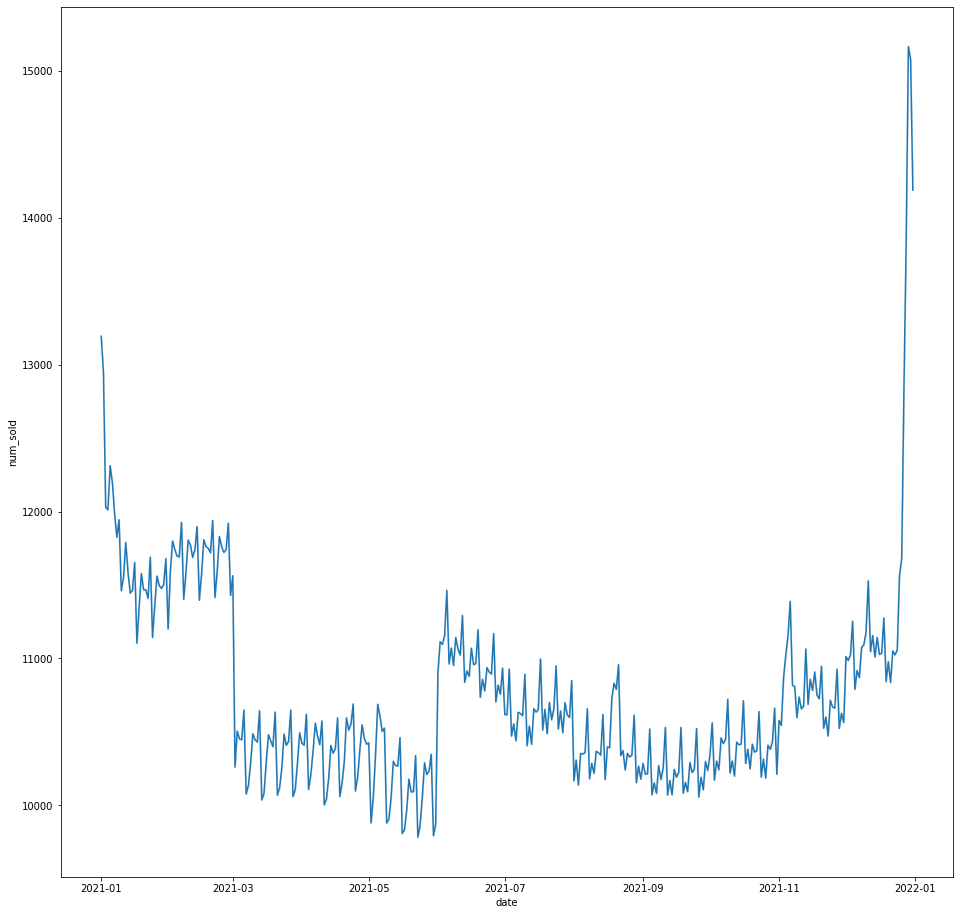

In [55]:
f, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(data=pd.concat([df_final_test, df_test['date']], axis=1), x='date', y='num_sold')

In [56]:
df_product_ratio_2019 = df_product_ratio.loc[((df_product_ratio['date'] >= '2019-01-01') & (df_product_ratio['date'] < '2020-01-01'))].copy()
df_product_ratio_2019['mm-dd'] = df_product_ratio_2019['date'].dt.strftime('%m-%d')
df_product_ratio_2019 = df_product_ratio_2019.drop(columns='date')

df_product_ratio_test = df_test.copy()
df_product_ratio_test['mm-dd'] = df_product_ratio_test['date'].dt.strftime('%m-%d')

df_product_ratio_test = pd.merge(df_product_ratio_test, df_product_ratio_2019, how='left', on=['mm-dd', 'product'])

display(df_product_ratio_2019)
display(df_product_ratio_test)

,product,ratio,mm-dd
2920,Kaggle Advanced Techniques,0.279273,01-01
2921,Kaggle Getting Started,0.230832,01-01
2922,Kaggle Recipe Book,0.188119,01-01
2923,Kaggle for Kids: One Smart Goose,0.301776,01-01
2924,Kaggle Advanced Techniques,0.281654,01-02
...,...,...,...
4375,Kaggle for Kids: One Smart Goose,0.304807,12-30
4376,Kaggle Advanced Techniques,0.277440,12-31
4377,Kaggle Getting Started,0.224633,12-31
4378,Kaggle Recipe Book,0.191453,12-31


,row_id,date,country,store,product,mm-dd,ratio
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,01-01,0.279273
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,01-01,0.230832
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,01-01,0.188119
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,01-01,0.301776
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,01-01,0.279273
...,...,...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,12-31,0.306473
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,12-31,0.277440
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,12-31,0.224633
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book,12-31,0.191453


<AxesSubplot:xlabel='date', ylabel='ratio'>

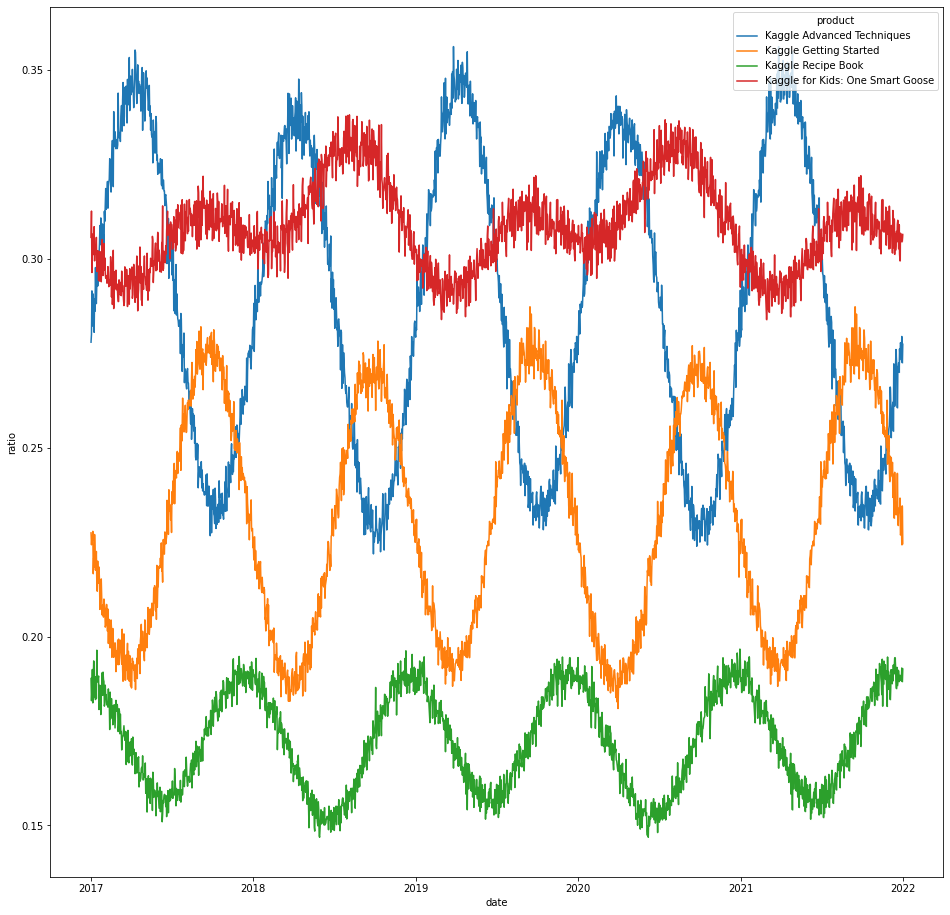

In [57]:
df_temp = pd.concat([df_product_ratio, df_product_ratio_test]).reset_index()
f, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(data=df_temp, x='date', y='ratio', hue='product')

In [58]:
df_submission = pd.concat([df_test, df_final_test['num_sold']], axis=1)
df_submission['ratio'] = df_product_ratio_test['ratio']
df_submission

,row_id,date,country,store,product,num_sold,ratio
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,13192.867132,0.279273
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,13192.867132,0.230832
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,13192.867132,0.188119
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,13192.867132,0.301776
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,13192.867132,0.279273
...,...,...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,14187.465501,0.306473
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,14187.465501,0.277440
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,14187.465501,0.224633
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book,14187.465501,0.191453


In [59]:
country_weights = df_train.groupby('country')['num_sold'].sum() \
                / df_train['num_sold'].sum()
country_weights

country
Belgium    0.204104
France     0.184381
Germany    0.204498
Italy      0.161540
Poland     0.098457
Spain      0.147020
Name: num_sold, dtype: float64

In [60]:
for country in country_weights.index:
    df_submission.loc[df_submission['country'] == country, 'num_sold'] *= country_weights[country]

for store in store_weights.index:
    df_submission.loc[df_submission['store'] == store, 'num_sold'] *= store_weights[store]

df_submission['num_sold'] *= df_submission['ratio']
df_submission['num_sold'] = df_submission['num_sold'].round()
df_submission

,row_id,date,country,store,product,num_sold,ratio
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,558.0,0.279273
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started,462.0,0.230832
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book,376.0,0.188119
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,603.0,0.301776
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,194.0,0.279273
...,...,...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,475.0,0.306473
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,149.0,0.277440
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,121.0,0.224633
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book,103.0,0.191453


In [61]:
df_submission = df_submission[['row_id', 'num_sold']]
df_submission.to_csv('submission.csv', index=False)
df_submission

,row_id,num_sold
0,70128,558.0
1,70129,462.0
2,70130,376.0
3,70131,603.0
4,70132,194.0
...,...,...
17515,87643,475.0
17516,87644,149.0
17517,87645,121.0
17518,87646,103.0
